In [287]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly_express as px

The following code loads the California Houses dataset from the CSV file.

In [288]:
Data = pd.read_csv('California_Housing_Cities.csv')

The next code displays the shape of the California Houses dataset, indicating the number of rows and columns. This is useful for understanding the size of the dataset and its dimensions.

In [289]:
print('-'*40)
print('California Houses Dataset Shape : {}'.format(Data.shape))
print('-'*40)

----------------------------------------
California Houses Dataset Shape : (20640, 17)
----------------------------------------


# Data Preprocessing

In [290]:
Data.head()

,Id,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,ocean_proximity,City
0,1,500001,1.2434,52,249,78,396,85,37.80,-122.27,2524.614616,552234.0515,731023.5749,61415.35211,14466.70538,NEAR BAY,Alameda
1,2,500001,1.1696,52,609,236,1349,250,37.87,-122.25,7897.024567,556856.9280,735788.3723,67242.51828,19172.81885,NEAR BAY,Alameda
2,3,500001,7.8521,52,1668,225,517,214,37.86,-122.24,9154.528309,555442.5086,734372.6023,65849.13943,19335.74118,NEAR BAY,Alameda
3,4,500001,9.3959,52,3726,474,1366,496,37.85,-122.24,8259.085109,554610.7171,733525.6829,64867.28983,18811.48745,NEAR BAY,Alameda
4,5,500001,7.8772,52,2990,379,947,361,37.83,-122.23,7284.913015,552365.4712,731263.5682,62493.11252,18750.94628,NEAR BAY,Alameda


In [291]:
Data.tail()

,Id,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,ocean_proximity,City
20635,20636,17500,2.3667,39,493,168,259,138,34.15,-118.33,21926.83929,13466.35773,1.928705e+05,478320.2992,546350.0596,<1H OCEAN,Los Angeles
20636,20637,14999,1.6607,16,255,73,85,38,39.71,-122.74,89894.93543,745210.34300,9.243866e+05,274118.5835,216934.5211,INLAND,Glenn
20637,20638,14999,2.1000,19,619,239,490,164,36.40,-117.02,297347.74660,283729.02440,4.098750e+05,445744.2779,503631.7185,INLAND,Kern
20638,20639,14999,4.1932,52,803,267,628,225,34.24,-117.86,61064.66015,41019.72423,1.814618e+05,500708.7456,568617.4593,INLAND,Los Angeles
20639,20640,14999,0.5360,36,98,28,18,8,40.31,-123.17,78672.51753,821033.80620,1.000130e+06,348749.4709,289116.4984,INLAND,Shasta


In [292]:
Data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        20640 non-null  int64  
 1   Median_House_Value        20640 non-null  int64  
 2   Median_Income             20640 non-null  float64
 3   Median_Age                20640 non-null  int64  
 4   Tot_Rooms                 20640 non-null  int64  
 5   Tot_Bedrooms              20640 non-null  int64  
 6   Population                20640 non-null  int64  
 7   Households                20640 non-null  int64  
 8   Latitude                  20640 non-null  float64
 9   Longitude                 20640 non-null  float64
 10  Distance_to_coast         20640 non-null  float64
 11  Distance_to_LA            20640 non-null  float64
 12  Distance_to_SanDiego      20640 non-null  float64
 13  Distance_to_SanJose       20640 non-null  float64
 14  Distan

There are no missing value and the Dtype are float64 or int64.

The following code drops the 'Id' column from the California Houses dataset. This step is performed to remove unnecessary columns that may not contribute to the model's prediction.

In [293]:
Data=Data.drop(['Id'], axis=1)

Data.shape

(20640, 16)

In [294]:
Data.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928650,117395.477500
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019100,1.736675e+05,2.147398e+05,459758.877000,526546.661700
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414478,5.271562e+05,7.057954e+05,516946.491000,584552.007950
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686400,1.018260e+06,1.196919e+06,836762.678200,903627.663300


The code creates a copy of the California Houses dataset and assigns it to a new variable 'DataCali'. This is done to preserve the original dataset while performing further operations.

In [295]:
DataCali=Data.copy()

**Duplicates and Null values**

The code block following that provides some exploratory data analysis. It prints the number of data points in the dataset, checks for duplicates, and identifies missing values in the DataFrame. It also replaces empty values with NaN and rechecks the missing values after replacement.

In [296]:
print('There are', DataCali.shape[0], 'data in this dataset')

# Do we have any duplicates?
print('Number of Duplicates:', len(DataCali[DataCali.duplicated()]))

# Do we have any missing values?
missing_values = DataCali.isnull().sum()
print('Number of Missing Values by column:\n',missing_values)

print('Number of Missing Values:', DataCali.isnull().sum().sum())

DataCali.replace("", np.nan, inplace=True)
missing_values = DataCali.isnull().sum()
print('Number of Missing Values by column after replacement:\n',missing_values)
print('Number of Missing Values after replacement:', DataCali.isnull().sum().sum())

There are 20640 data in this dataset
Number of Duplicates: 0
Number of Missing Values by column:
 Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
ocean_proximity             0
City                        0
dtype: int64
Number of Missing Values: 0
Number of Missing Values by column after replacement:
 Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA            

# Heatmap to visualize missing data

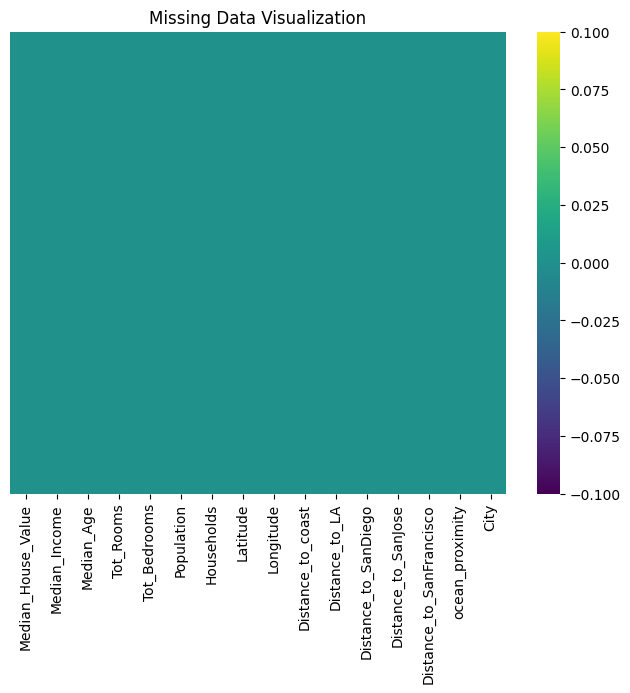

In [297]:
plt.figure(figsize=(8, 6))
sns.heatmap(DataCali.isnull(),yticklabels=False,cmap='viridis');
plt.title('Missing Data Visualization')
plt.show()

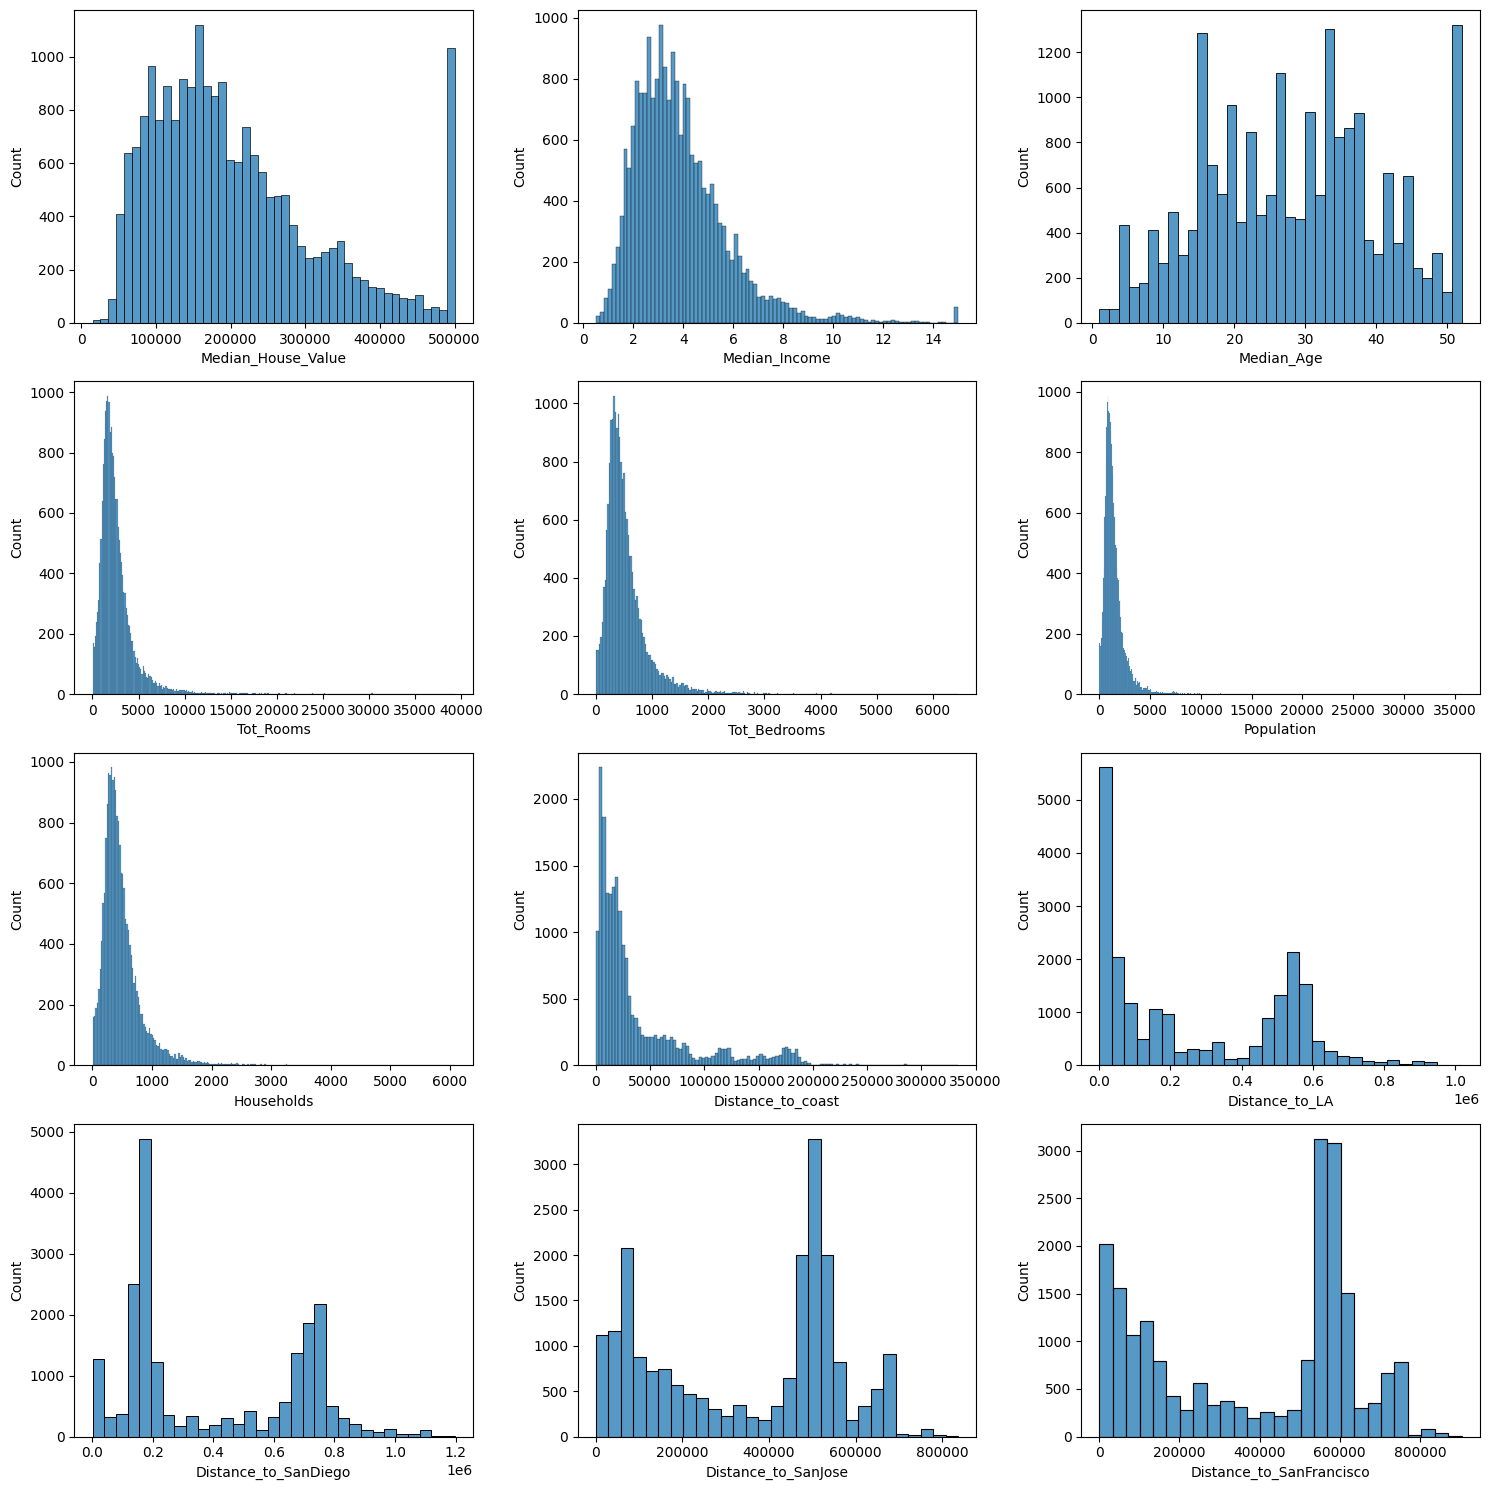

In [298]:
fig, ax = plt.subplots(4, 3, figsize=[15,15])
sns.histplot(data=DataCali, x="Median_House_Value", ax=ax[0, 0])
sns.histplot(data=DataCali, x="Median_Income", ax=ax[0, 1])
sns.histplot(data=DataCali, x="Median_Age", ax=ax[0, 2])
sns.histplot(data=DataCali, x="Tot_Rooms", ax=ax[1, 0])
sns.histplot(data=DataCali, x="Tot_Bedrooms", ax=ax[1, 1])
sns.histplot(data=DataCali, x="Population", ax=ax[1, 2])
sns.histplot(data=DataCali, x="Households", ax=ax[2, 0])
sns.histplot(data=DataCali, x="Distance_to_coast", ax=ax[2, 1])
sns.histplot(data=DataCali, x="Distance_to_LA", ax=ax[2, 2])
sns.histplot(data=DataCali, x="Distance_to_SanDiego", ax=ax[3, 0])
sns.histplot(data=DataCali, x="Distance_to_SanJose", ax=ax[3, 1])
sns.histplot(data=DataCali, x="Distance_to_SanFrancisco", ax=ax[3, 2])
fig.tight_layout()
plt.show()

# Summary statistics for the column Median House Value

In [299]:
DataCali['Median_House_Value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: Median_House_Value, dtype: float64

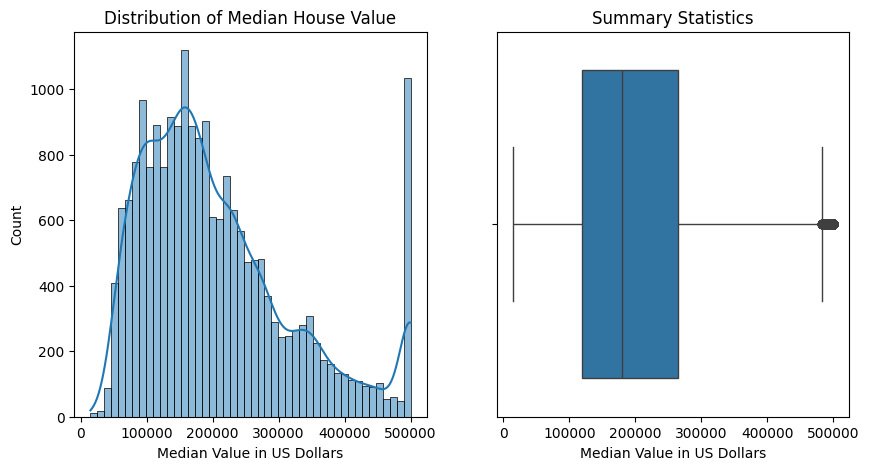

In [300]:
fig, (ax_1, ax_2) = plt.subplots(ncols = 2, figsize = (10,5))

sns.histplot(DataCali['Median_House_Value'], kde = True, ax = ax_1)
ax_1.set_title('Distribution of Median House Value')
ax_1.set_xlabel('Median Value in US Dollars')
ax_1.set_ylabel('Count')

sns.boxplot(x = DataCali['Median_House_Value'], ax = ax_2)
ax_2.set_title('Summary Statistics')
ax_2.set_xlabel('Median Value in US Dollars')

plt.show()

# Visually test if Median House Value is normally distributed using a QQ plot

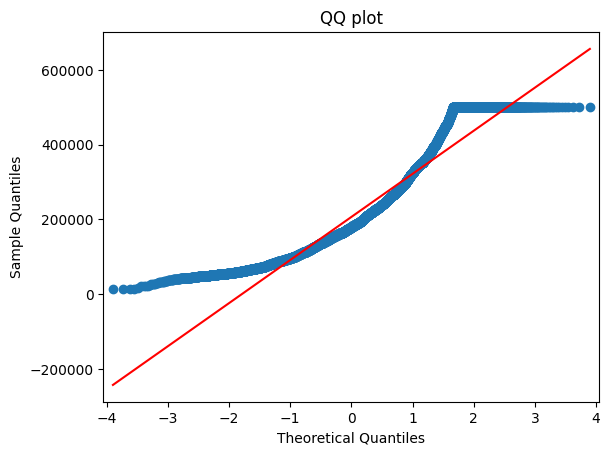

In [301]:
fig, ax = plt.subplots()
sm.qqplot(DataCali['Median_House_Value'], line ='s', ax = ax)
ax.set_title('QQ plot')
plt.show()

# Summary statistics for the column Median Income

In [302]:
DataCali['Median_Income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: Median_Income, dtype: float64

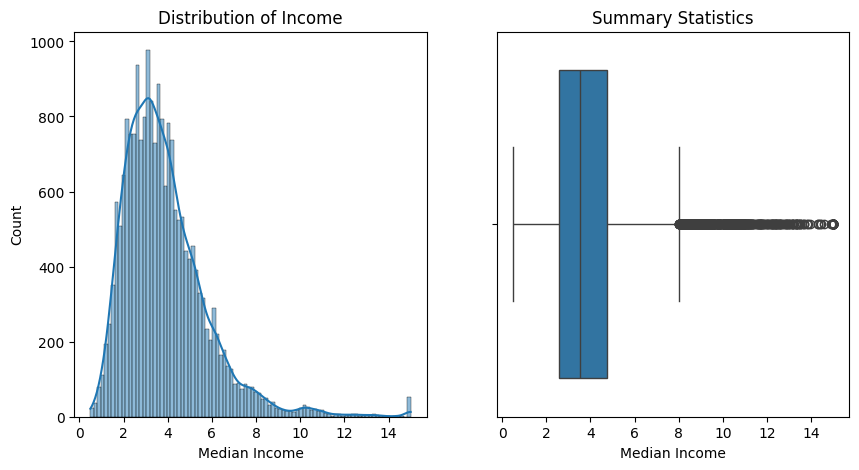

In [303]:
fig, (ax_1, ax_2) = plt.subplots(ncols = 2, figsize= (10,5))

sns.histplot(DataCali['Median_Income'], kde = True, ax = ax_1)
ax_1.set_title('Distribution of Income')
ax_1.set_xlabel('Median Income')
ax_1.set_ylabel('Count')

sns.boxplot(x = DataCali['Median_Income'], ax = ax_2)
ax_2.set_title('Summary Statistics')
ax_2.set_xlabel("Median Income")

plt.show()

# Summary statistics for the column Median Age

In [304]:
DataCali['Median_Age'].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: Median_Age, dtype: float64

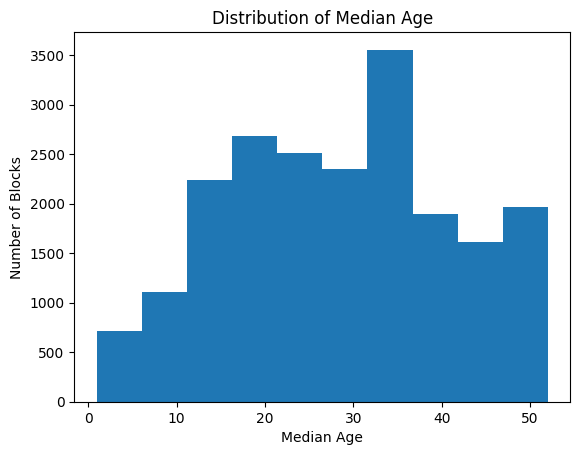

In [305]:
ma_plt = DataCali['Median_Age'].plot(kind ='hist', bins = 10, title = 'Distribution of Median Age')
ma_plt.ticklabel_format(useOffset = False, style ='plain')
ma_plt.set_ylabel('Number of Blocks')
ma_plt.set_xlabel('Median Age')
plt.show()

# Summary statistics for the column Total Rooms

In [306]:
DataCali['Tot_Rooms'].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: Tot_Rooms, dtype: float64

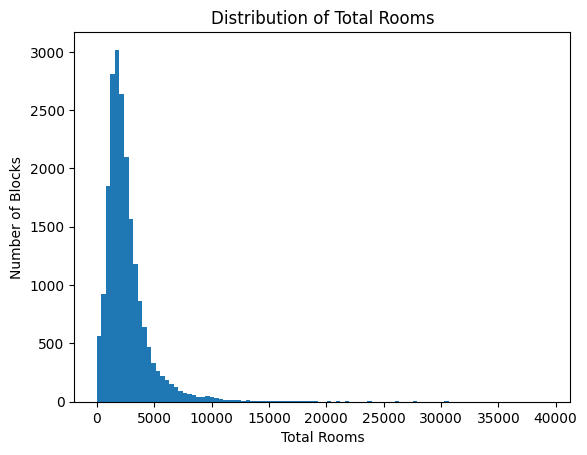

In [307]:
nr_plt = DataCali['Tot_Rooms'].plot(kind = 'hist', bins = 100, title= 'Distribution of Total Rooms')
nr_plt.ticklabel_format(useOffset = False, style ='plain')
nr_plt.set_ylabel('Number of Blocks')
nr_plt.set_xlabel('Total Rooms')
plt.show()

# Summary statistics for the column Total Bedrooms

In [308]:
DataCali['Tot_Bedrooms'].describe()

count    20640.000000
mean       537.898014
std        421.247906
min          1.000000
25%        295.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: Tot_Bedrooms, dtype: float64

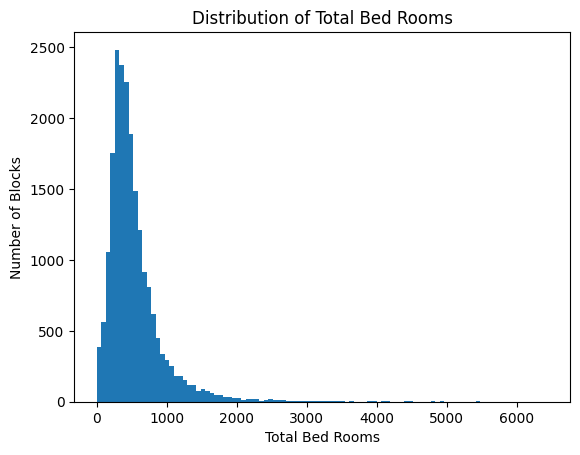

In [309]:
nb_plt = DataCali['Tot_Bedrooms'].plot(kind = 'hist', bins = 100, title = 'Distribution of Total Bed Rooms')
nb_plt.ticklabel_format(useOffset = False, style ='plain')
nb_plt.set_ylabel('Number of Blocks')
nb_plt.set_xlabel('Total Bed Rooms')
plt.show()

# Summary statistics for the column Population

In [310]:
DataCali['Population'].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: Population, dtype: float64

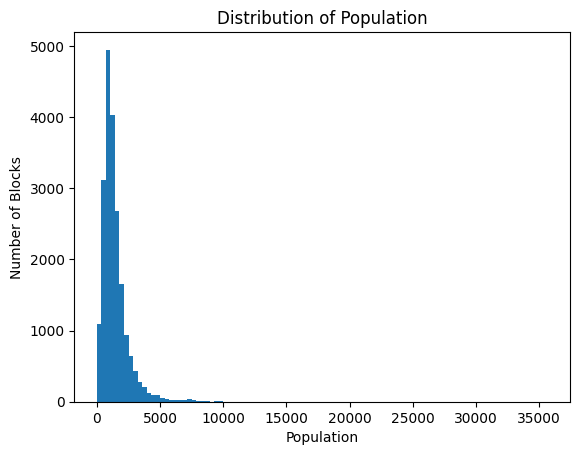

In [311]:
pop_plt = DataCali['Population'].plot(kind = 'hist', bins = 100, title = 'Distribution of Population')
pop_plt.ticklabel_format(useOffset = False, style = 'plain')
pop_plt.set_ylabel('Number of Blocks')
pop_plt.set_xlabel('Population')
plt.show()

# Summary statistics for the column Households

In [312]:
DataCali['Households'].describe()

count    20640.000000
mean       499.539680
std        382.329753
min          1.000000
25%        280.000000
50%        409.000000
75%        605.000000
max       6082.000000
Name: Households, dtype: float64

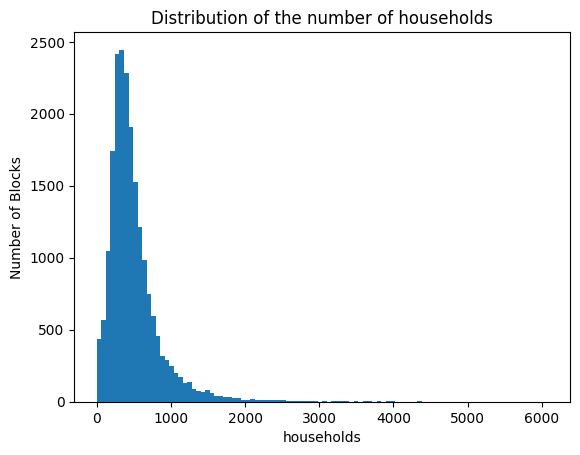

In [313]:
ho_plt = DataCali['Households'].plot(kind = 'hist', bins = 100, title = 'Distribution of the number of households')
ho_plt.ticklabel_format(useOffset = False, style ='plain')
ho_plt.set_ylabel('Number of Blocks')
ho_plt.set_xlabel('households')
plt.show()

# Distribution of cities in California

In [314]:
color_scale = px.colors.qualitative.Set1 

fig = px.histogram(DataCali, x="City", title='Cities in California', width=1000, height=800,
                   color="City", color_discrete_sequence=color_scale)

fig.update_layout(xaxis_tickangle=-45)

fig.show()

# Distribution of ocean proximity in California

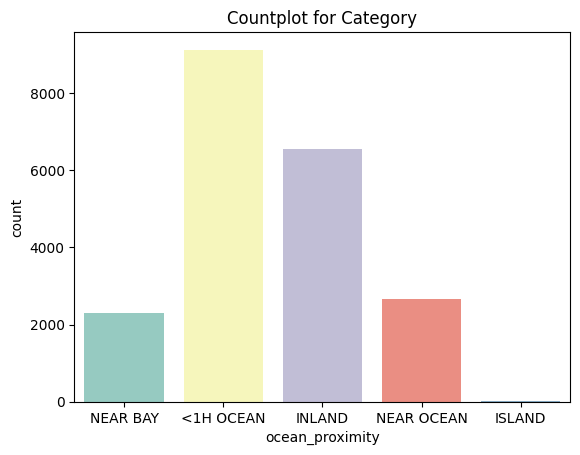

In [317]:
custom_palette = sns.color_palette("Set3", len(DataCali['ocean_proximity'].unique()))

sns.countplot(x='ocean_proximity', hue='ocean_proximity', data=DataCali, palette=custom_palette, legend=False)
plt.title('Countplot for Category')
plt.show()

# Median Income Vs Median House Value

Text(0.5, 1.0, 'Median Income Vs Median House Value')

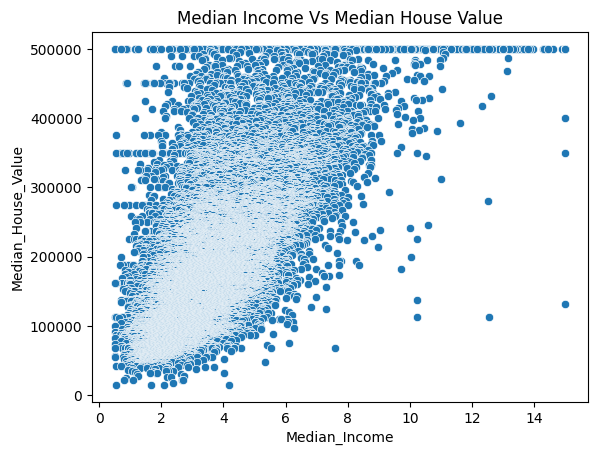

In [316]:
sns.scatterplot(data=DataCali, x='Median_Income', y='Median_House_Value')
plt.title("Median Income Vs Median House Value")